test set 
Proteomic Analysis of Upregulated and Downregulated Proteins 

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px

# Read the Excel file (change 'your_file.xlsx' to your filename)
df = pd.read_excel("/Users/snaseem/github/plots/volcanoplot/samplefile3output.xlsx")
df = df.rename(columns={'log2_fold_change': 'log2_Fold_change_A/B'})
df = df.rename(columns={'p_value': 'p-value'})
df = df.rename(columns={'p_value_adjusted': 'p_adjusted(BH)'})


In [18]:
df.head()

,Protein,Protein.Group,Protein.Names,Protein.Description,log2_mean_250129_2,log2_mean_250129_1,log2_std_250129_2,log2_std_250129_1,p-value,t_stat,p_adjusted(BH),log2_Fold_change_A/B
0,a1,a1,a1,a1,22.645534,20.976661,0.068267,1.136944,0.125590,2.537834,0.417929,1.668873
1,a2,a2,a2,a2,16.711749,14.501826,0.404253,0.896465,0.034427,3.892324,0.290545,2.209923
2,a3,a3,a3,a3,22.997211,22.468393,0.040428,0.299373,0.089711,3.032010,0.401168,0.528818
3,a4,a4,a4,a4,23.538433,23.349098,0.062021,0.127270,0.106479,2.316311,0.406159,0.189335
4,a5,a5,a5,a5,24.039186,24.083372,0.096306,0.092542,0.597363,-0.573001,0.728097,-0.044185


In [19]:
# Compute -log10(p-value)
df['-log10(p-value)'] = -np.log10(df['p-value'])

conditions = [
    (df['p-value'] < 0.05) & (df['log2_Fold_change_A/B'] > 1),
    (df['p-value'] < 0.05) & (df['log2_Fold_change_A/B'] < -1)
]
choices = ['UP', 'DOWN']
df['Significance'] = np.select(conditions, choices, default='Not Significant')

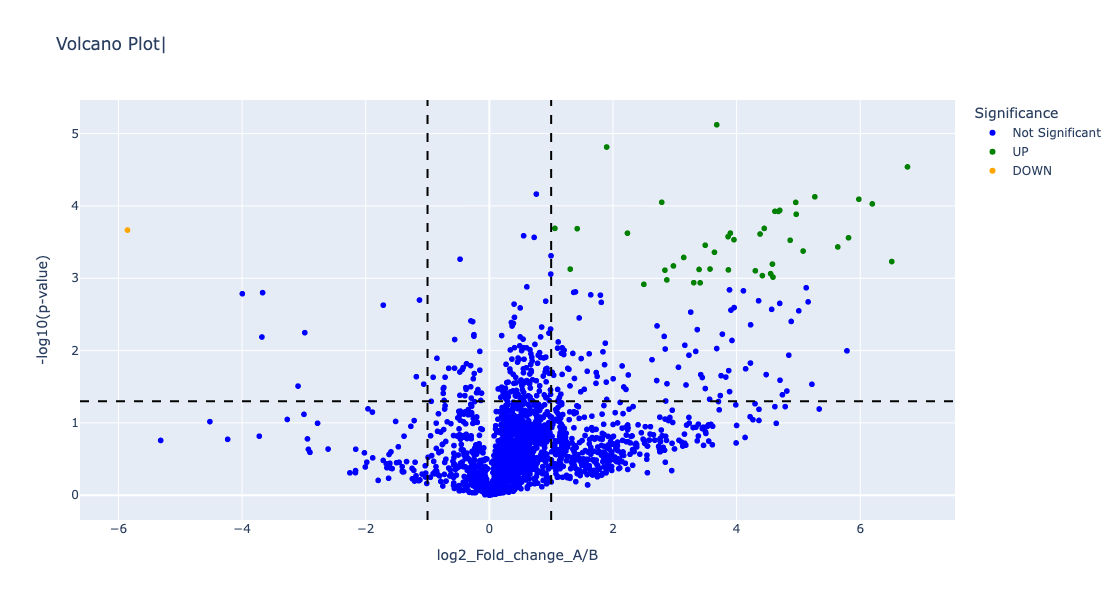

In [44]:
fig = px.scatter(
    df,
    x='log2_Fold_change_A/B',
    y='-log10(p-value)',
    color='Significance',
    color_discrete_map={
        "UP": "green", 
        "DOWN": "orange", 
        "Not Significant": "blue"
    },
    hover_data=['Protein', 'Protein.Names', 'Protein.Description'],
    title='Volcano Plot| ',
    width=1200,   # Increased width
    height=600   # Increased height
)

# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [21]:
# List proteins to highlight
highlight_proteins = ['a16','a1353','c11','d11']

# Separate highlighted and remaining data
df_highlight = df[df['Protein'].isin(highlight_proteins)]
df_rest = df[~df['Protein'].isin(highlight_proteins)]

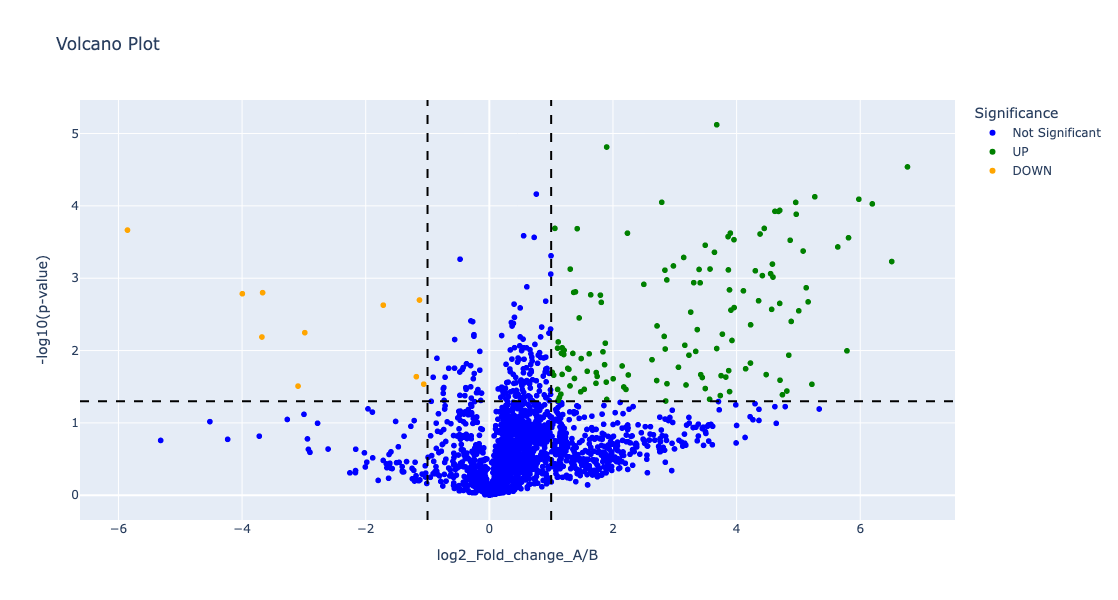

In [22]:
# Plot the rest of the data
fig = px.scatter(
    df_rest,
    x='log2_Fold_change_A/B',
    y='-log10(p-value)',
    color='Significance',
    color_discrete_map={
        "UP": "green",
        "DOWN": "orange",
        "Not Significant": "blue"
    },
    hover_data=['Protein', 'Protein.Names', 'Protein.Description'],
    title='Volcano Plot',
    width=800,
    height=600
)

# Add the highlighted protein in red
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers',
    marker=dict(color='red', size=8, symbol='circle'),
    name='Aldb-ii'
)

# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [39]:
# List proteins to highlight
highlight_proteins = ['a16','a1353','c11','d11']

# Separate highlighted and remaining data
df_highlight = df[df['Protein'].isin(highlight_proteins)]
df_rest = df[~df['Protein'].isin(highlight_proteins)]

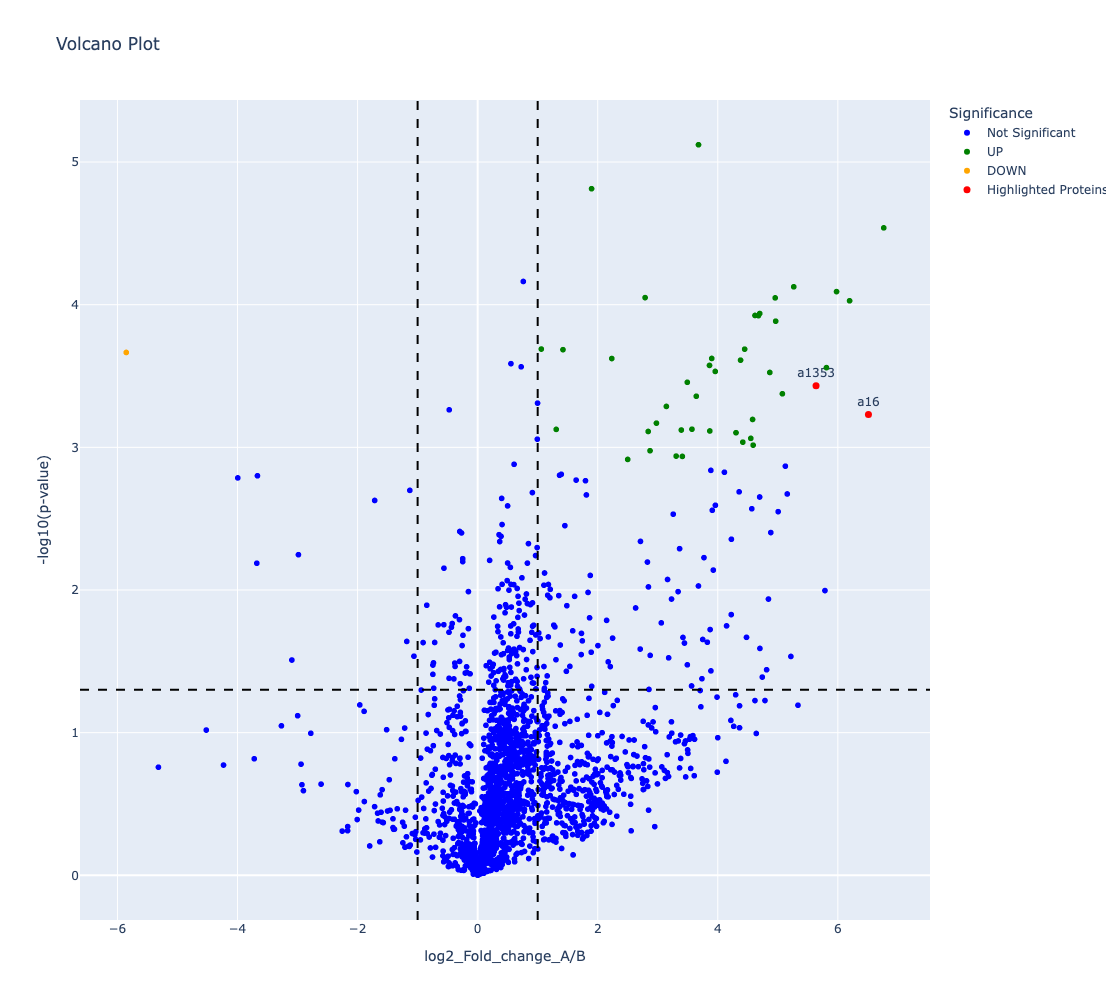

In [40]:
# Plot the rest of the data with default colors
fig = px.scatter(
    df_rest,
    x='log2_Fold_change_A/B',
    y='-log10(p-value)',
    color='Significance',
    color_discrete_map={
        "UP": "green",
        "DOWN": "orange",
        "Not Significant": "blue"
    },
    hover_data=['Protein', 'Protein.Names', 'Protein.Description'],
    title='Volcano Plot',
    width=1200,
    height=1000
)

# Add highlighted proteins in red with labels
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers+text',
    marker=dict(color='red', size=7, symbol='circle'),
    text=df_highlight['Protein'],
    textposition='top center',
    name='Highlighted Proteins'
)

# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [41]:
# p adjusted  p_adjusted(BH)

In [42]:
# Compute -log10(p-value)
df['-log10(p_adjusted(BH))'] = -np.log10(df['p_adjusted(BH)'])

conditions = [
    (df['p_adjusted(BH)'] < 0.05) & (df['log2_Fold_change_A/B'] > 1),
    (df['p_adjusted(BH)'] < 0.05) & (df['log2_Fold_change_A/B'] < -1)
]
choices = ['UP', 'DOWN']
df['Significance'] = np.select(conditions, choices, default='Not Significant')

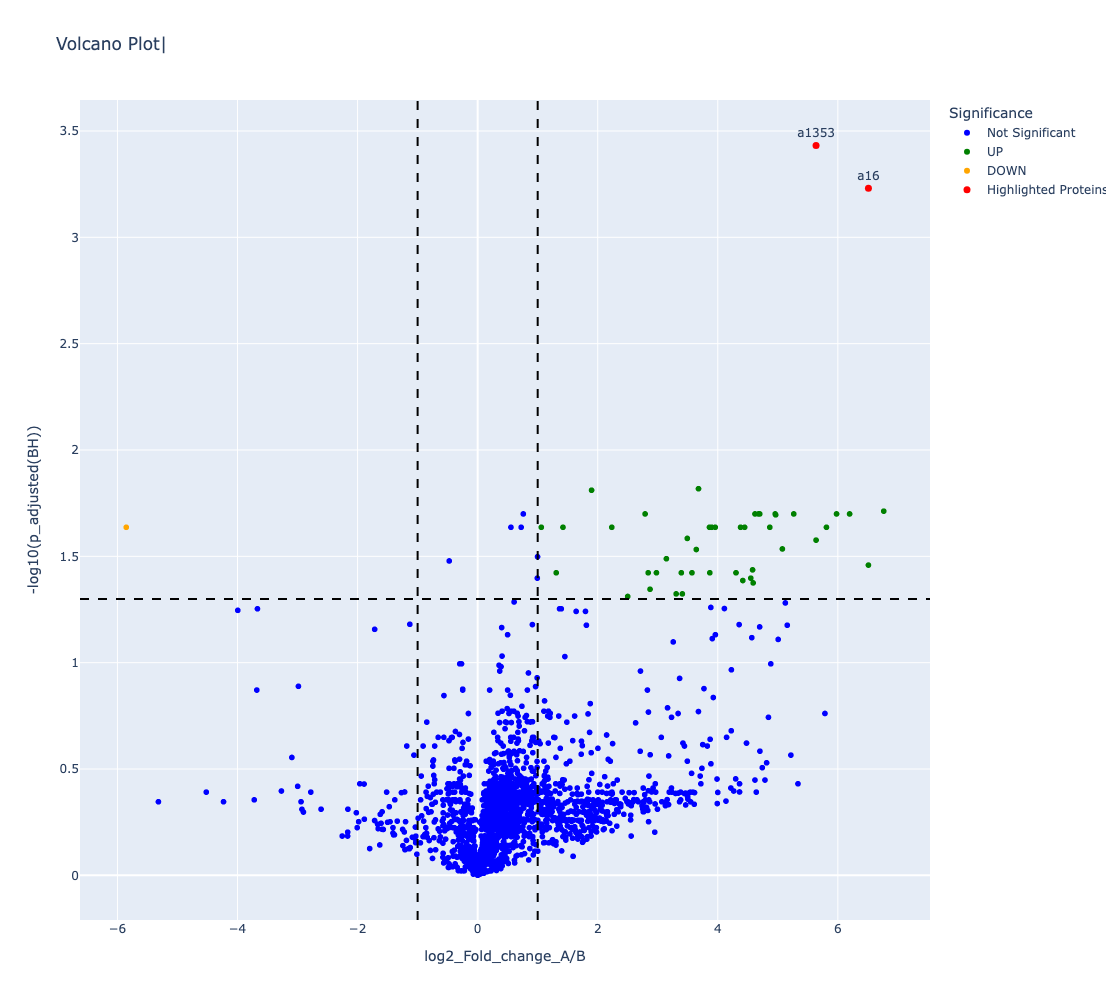

In [43]:
fig = px.scatter(
    df,
    x='log2_Fold_change_A/B',
    y='-log10(p_adjusted(BH))',
    color='Significance',
    color_discrete_map={
        "UP": "green", 
        "DOWN": "orange", 
        "Not Significant": "blue"
    },
    hover_data=['Protein', 'Protein.Names', 'Protein.Description'],
    title='Volcano Plot|',
    width=1200,   # Increased width
    height=1000   # Increased height
)

# Add highlighted proteins in red with labels
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers+text',
    marker=dict(color='red', size=7, symbol='circle'),
    text=df_highlight['Protein'],
    textposition='top center',
    name='Highlighted Proteins'
)
# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [35]:
df


,Protein,Protein.Group,Protein.Names,Protein.Description,log2_mean_250129_2,log2_mean_250129_1,log2_std_250129_2,log2_std_250129_1,p-value,t_stat,p_adjusted(BH),log2_Fold_change_A/B,-log10(p-value),Significance,-log10(p_adjusted(BH))
0,a1,a1,a1,a1,22.645534,20.976661,0.068267,1.136944,0.125590,2.537834,0.417929,1.668873,0.901047,Not Significant,0.378897
1,a2,a2,a2,a2,16.711749,14.501826,0.404253,0.896465,0.034427,3.892324,0.290545,2.209923,1.463099,Not Significant,0.536787
2,a3,a3,a3,a3,22.997211,22.468393,0.040428,0.299373,0.089711,3.032010,0.401168,0.528818,1.047152,Not Significant,0.396674
3,a4,a4,a4,a4,23.538433,23.349098,0.062021,0.127270,0.106479,2.316311,0.406159,0.189335,0.972738,Not Significant,0.391304
4,a5,a5,a5,a5,24.039186,24.083372,0.096306,0.092542,0.597363,-0.573001,0.728097,-0.044185,0.223762,Not Significant,0.137811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,a2006,a2006,a2006,a2006,21.107310,20.332368,0.132954,0.436023,0.080531,2.944523,0.388546,0.774942,1.094034,Not Significant,0.410558
2006,a2007,a2007,a2007,a2007,22.915920,22.191102,0.026064,0.314781,0.056578,3.974632,0.352374,0.724818,1.247351,Not Significant,0.452996
2007,a2008,a2008,a2008,a2008,20.312865,18.729462,0.529561,0.490609,0.019323,3.799079,0.232570,1.583402,1.713925,Not Significant,0.633446
2008,a2009,a2009,a2009,a2009,24.717164,24.387730,0.053871,0.195355,0.090779,2.815719,0.401907,0.329433,1.042014,Not Significant,0.395874
